### Ejercicio 1
Agrupa los distintos vuelos utilizando el algoritmo de K-means.


Descripción de las variables: https://www.kaggle.com/code/adveros/flight-delay-eda-exploratory-data-analysis

In [1]:
import pandas as pd

In [2]:
# Cargar los datos
filename = 'C:/Users/Lucía Alvarez/OneDrive - psico.edu.uy/00 Barcelona activa/DelayedFlights.csv'
df = pd.read_csv(filename, sep=",", encoding="utf8") 

# Se selecciona unicamente los 2.000 casos del dataframe para que el programa ejecute los análisis sin problemas
df = df.iloc[0:2000]

In [3]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.ArrDelay.unique()

array([-14.,   2.,  14.,  34.,  11.,  57.,   1.,  80.,  15., -15.,  16.,
        37.,  19.,   6.,  -7.,  47.,   4.,  64.,  -4.,  -5.,  72.,   5.,
        29., -11., -22., -26., -12.,  -8.,  21., 304.,  35.,  49.,  38.,
        30.,  26.,  31.,  36.,  10.,  62.,  43.,  77.,  50.,   8.,  78.,
        54.,  20.,  60.,  24.,  52.,  69.,  55., 210.,  13.,  17.,  18.,
        32.,  51.,  63., 112.,   0.,  33.,  39.,  22., 254.,  41.,  -2.,
        27.,  59., -16.,  25., 115.,  40.,  53.,  93.,  71.,  58.,   7.,
         3.,  84.,  28.,  65.,   9.,  12.,  56.,  42.,  -1., 268.,  88.,
       139., 176.,  48., 114.,  23.,  75.,  74.,  76.,  -6.,  96.,  66.,
       -10., 118.,  70., 203., 129., 131., 184.,  46.,  44., 288.,  86.,
        -3.,  68.,  90., 107., 163.,  67., 202.,  95., 178.,  91.,  45.,
        81.,  97., 220., 103.,  82., 144., 106., 132., 126., 108.,  92.,
       276., 215.,  79., 120.,  94.,  89.,  61., 130.,  87., 104.,  98.,
       147., 105.,  73., 141., -19.,  -9., -13.,  8

In [5]:
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
 #%% Se eliminan filas que tengan valor NaN.
df = df.dropna()
df = df.reset_index(drop=True)

In [8]:
df2 = df.loc[:, ['ArrDelay']]
df2

,ArrDelay
0,34.0
1,57.0
2,80.0
3,15.0
4,16.0
...,...
1210,33.0
1211,54.0
1212,21.0
1213,42.0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ArrDelay  1215 non-null   float64
dtypes: float64(1)
memory usage: 9.6 KB


No hay valores perdidos en la variable seleccionada

In [10]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df2_escalado = min_max_scaler.fit_transform(df2)
df2_escalado = pd.DataFrame(df2_escalado) # Hay que convertir a DF el resultado.
df2_escalado = df2_escalado.rename(columns = {0: 'ArrDelay_escalado'})
df2_escalado

,ArrDelay_escalado
0,0.065744
1,0.145329
2,0.224913
3,0.000000
4,0.003460
...,...
1210,0.062284
1211,0.134948
1212,0.020761
1213,0.093426


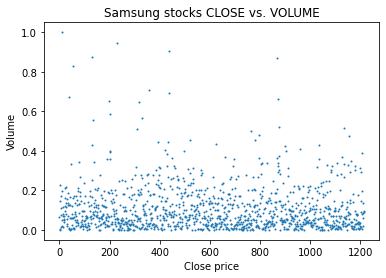

In [11]:
#%% Representación gráfica de los datos.
#CAMBIAR NOMBRES DE LAS TABLAS
x = df2_escalado.index
y = df2_escalado['ArrDelay_escalado'].values
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks CLOSE vs. VOLUME')
plt.plot(x,y,'o',markersize=1)


Se  visualiza la nube de puntos de la variable seleccionada para observar cómo se comporta.
En este gráfico vemos cierta dispersión de los datos. 

A continuación, realizamos un gráfico  elbow con el fin de determinar el número óptimo de clústeres. 

D:\servidor\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


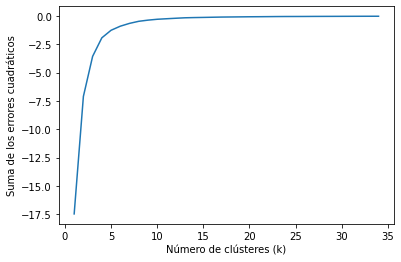

In [12]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 35) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df2_escalado).score(df2_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

#Lo que dice en el enlace de ayuda:
"La curva elbow nos muestra que un valor de k = 5 puede ser apropiado, aunque se podría probar con valores entre 5 y 10 y comparar resultados. No hay una solución, un valor de k, más correcto que otro, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución escogida.

Así que ya podemos aplicar el algoritmo de k-means:"

In [13]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df2_escalado)
centroids = kmeans.cluster_centers_
print("El algoritmo muestra por pantalla las coordenadas de los 5 centroides: \n", centroids)

El algoritmo muestra por pantalla las coordenadas de los 5 centroides: 
 [[0.02948336]
 [0.21065951]
 [0.37324445]
 [0.77242481]
 [0.10543341]]


In [14]:
#Ya hemos ejecutado k-means y obtenido los centroides. Ahora podemos asignar cada registro de nuestro dataset a uno de los clústers:

#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df2_escalado)
df['clusters'] = labels
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,clusters
0,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,0
1,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,4
2,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0,1
3,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0,0
4,18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,...,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0,0


IndexError: index 1 is out of bounds for axis 1 with size 1

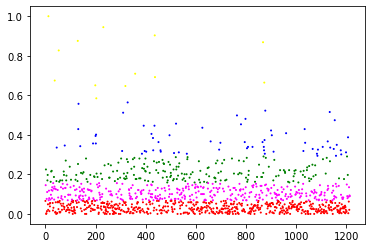

In [15]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks k-means clustering')
plt.show()

###  Ejercicio 2
Agrupa los distintos vuelos utilizando el algoritmo de clustering jerárquico.

##### Enlaces de ayuda del Ejercicio 1:
http://exponentis.es/ejemplo-de-clustering-con-k-means-en-python


##### Enlaces de ayuda del Ejercicio 1:
